In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


df = pd.read_csv('ACCIDENTESVIALES_3.csv', encoding='latin-1')



In [2]:
df.head()


,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11
0,01/03/2024,A001602262,CALLE 14A CARRERA 34 BACHUE,SECUNDARIA,BACHUE,2,2,HERIDOS,0,0,NaN,NaN
1,01/06/2024,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SECUNDARIA,SAN JOSÃ,2,3,HERIDOS,0,0,NaN,NaN
2,01/09/2024,A001602264,KILOMETRO 7+800 MTS,PRINCIPAL,No registra,1,1,HERIDOS,0,0,NaN,NaN
3,01/12/2024,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,PRINCIPAL,LA TIZA,2,2,HERIDOS,0,0,NaN,NaN
4,01/12/2024,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,PRINCIPAL,No registra,2,1,HERIDOS,0,0,NaN,NaN


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('ACCIDENTESVIALES_2.csv')

X = df.drop(columns=['Codigo_Accidente', 'Muertes SI/NO', '# Muertes'])
y = df['Muertes SI/NO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import numpy as np
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nDistribución de predicciones:")
print(np.unique(y_pred, return_counts=True))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        15

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154


Distribución de predicciones:
(array([0, 1]), array([139,  15]))


In [7]:
model_corr = LogisticRegression(max_iter=200, class_weight='balanced')
model_corr.fit(X_train, y_train)
y_pred_corr = model_corr.predict(X_test)
y_prob_corr = model_corr.predict_proba(X_test)[:, 1]

Reporte de clasificación (modelo corregido):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        15

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



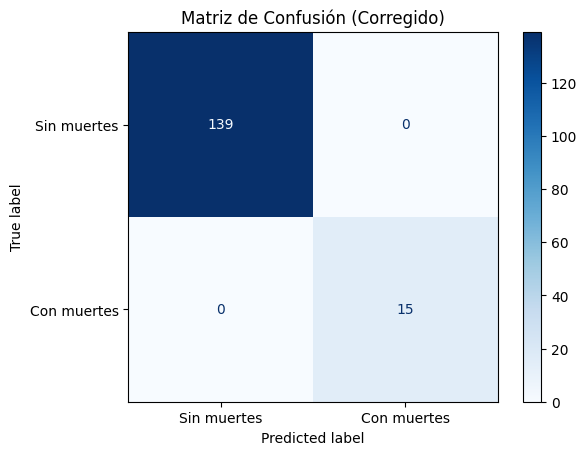

In [10]:

import matplotlib.pyplot as plt
print("Reporte de clasificación (modelo corregido):")
print(classification_report(y_test, y_pred_corr, zero_division=0))

cm = confusion_matrix(y_test, y_pred_corr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sin muertes", "Con muertes"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (Corregido)")
plt.show()

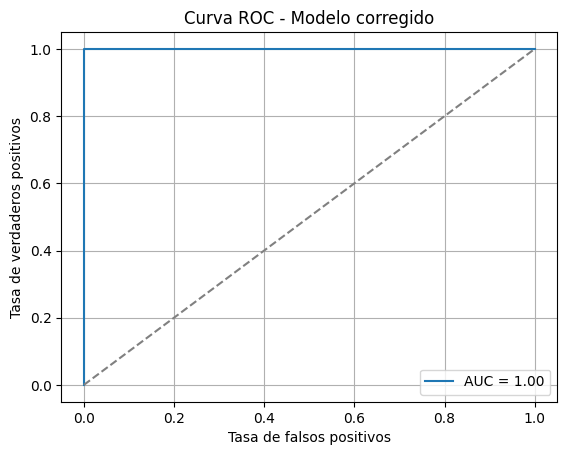

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob_corr)
auc = roc_auc_score(y_test, y_prob_corr)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Modelo corregido")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc